In [1]:
import os, json, random, re
from collections import defaultdict
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
coco = json.load(open("../data/coco/annotations/dataset_coco.json", "r"))['images']
print(len(coco))

123287


In [3]:
pprint(coco[0])

{'cocoid': 391895,
 'filename': 'COCO_val2014_000000391895.jpg',
 'filepath': 'val2014',
 'imgid': 0,
 'sentences': [{'imgid': 0,
                'raw': 'A man with a red helmet on a small moped on a dirt '
                       'road. ',
                'sentid': 770337,
                'tokens': ['a',
                           'man',
                           'with',
                           'a',
                           'red',
                           'helmet',
                           'on',
                           'a',
                           'small',
                           'moped',
                           'on',
                           'a',
                           'dirt',
                           'road']},
               {'imgid': 0,
                'raw': 'Man riding a motor bike on a dirt road on the '
                       'countryside.',
                'sentid': 771687,
                'tokens': ['man',
                           'riding',
    

In [3]:
all_sentences = []
for d in coco:
    for s in d['sentences']:
        all_sentences.append((s['raw'], d['filename']))
print(len(all_sentences))

616767


In [4]:
relations = [
    "on top of",
    "bottom of",
    " under ",
    " beneath ",
    "in front of",
    " behind ",
    "on the left",
    "on the right",
    "left of",
    "right of",
]
r2s = defaultdict(list)
for s in all_sentences:
    for r in relations:
        if r in s[0]:
            r2s[r].append(s)
for k in r2s:
    print(k, len(r2s[k]))

in front of 17939
 beneath  492
on top of 16372
 under  6720
 behind  6580
bottom of 323
on the left 42
left of 25
on the right 52
right of 16


In [5]:
r2s['on the right'][:10]

[('The black and white photograph of a classroom of schoolchildren is a bit out of focus on the right side of the picture.',
  'COCO_val2014_000000390555.jpg'),
 ('A three frame photo combination showcases two types of pie on the right and left side with a coffee in the middle.  ',
  'COCO_val2014_000000417285.jpg'),
 ('Split picture with a multi-color cat on the left and a brownish colored dog on the right',
  'COCO_val2014_000000399769.jpg'),
 ('A garbage truck parked on the right side of a street',
  'COCO_val2014_000000510719.jpg'),
 ('Two views of a city street, the one on the left of traffic signals on the right traffic on the street.',
  'COCO_val2014_000000124102.jpg'),
 ('A picture of a man with suit, tie and serious face on the left side and wild hair, a smile, and a T-shirt on the right side.',
  'COCO_val2014_000000564404.jpg'),
 ('A red fire hydrant on the right side of a road. ',
  'COCO_val2014_000000441468.jpg'),
 ('A man riding an elephant on a road with a truck passin

Split picture with a multi-color cat on the left and a brownish colored dog on the right


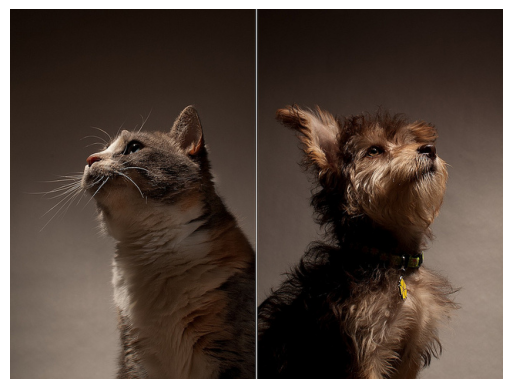

In [6]:
s, imfile = random.choice(r2s['on the right'])
im = Image.open("../data/coco/images/{}/{}".format(imfile.split("_")[1], imfile))
print(s)
plt.axis("off")
plt.imshow(im)